In [65]:
import torch
import torchvision 
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [1]:
import torch.nn.functional as F
from torch import nn
class Mnist(nn.Module):
    def __init__(self):
        super(Mnist, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, x.shape[1]*x.shape[2]*x.shape[3])
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [78]:
from torch.utils.data import DataLoader
from configs import fedl_params
from torch import nn

train_loader = DataLoader(train_dataset,batch_size=64)

model0 = Mnist()
model = Mnist()
model.train()
kk = model.state_dict()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1, momentum=0.5)
l1_lambda = 0.7
for epoch in range(10):
    for data,target in train_loader:
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        # print(model.parameters())
        # print(model.state_dict())
        for p in model.parameters():
            # print(p)
            print('first')
            print(p.grad)
            print(p.grad.data)
            # print(torch.sign(p))
            p.grad = p.grad + l1_lambda * torch.sign(p)
            break
        for p in model.parameters():
            print('second')
            print(p.grad)
            break
        break
    break

        

first
tensor([[[[-1.3603e-03, -1.2890e-03, -2.7180e-04,  1.6878e-03,  6.6695e-04],
          [-1.9380e-04, -7.7319e-04,  7.5433e-04, -1.0304e-04,  3.3000e-04],
          [-1.4080e-03,  1.7930e-03,  1.8856e-03,  3.9164e-05,  1.9328e-03],
          [-7.1406e-04,  2.9150e-03,  2.1352e-03,  9.0701e-04,  1.3595e-03],
          [ 6.5306e-04,  1.6545e-03,  1.0089e-03,  1.0613e-03,  1.4596e-03]]],


        [[[ 1.9566e-04,  4.4782e-04, -4.2625e-04, -2.6204e-04, -6.1343e-04],
          [ 1.7596e-03,  8.0793e-04, -1.1185e-03,  4.4826e-04,  1.0328e-04],
          [ 2.8768e-03,  1.1406e-04, -2.1821e-03, -2.8039e-03, -1.4895e-03],
          [ 2.3974e-03,  9.6932e-04,  5.5794e-05, -1.9315e-03, -1.1177e-03],
          [ 1.6928e-04, -4.4182e-04, -1.0862e-03, -9.6205e-04, -1.4641e-03]]],


        [[[ 6.7977e-04, -4.5015e-05,  2.6043e-04,  3.7562e-04,  1.2388e-03],
          [ 3.6587e-03,  1.4177e-03,  1.5232e-03,  4.0510e-04,  1.1500e-03],
          [ 3.2988e-03,  2.5273e-03, -1.8822e-04, -1.9760e-03,

In [300]:
a = torch.rand((2,2,2))
b = torch.rand((2,2,2))
c = torch.rand((2,2,2))
sor = torch.stack((a,b,c))
print(sor)



tensor([[[[0.7763, 0.9751],
          [0.0840, 0.0292]],

         [[0.6322, 0.0356],
          [0.2102, 0.4385]]],


        [[[0.8721, 0.0517],
          [0.2492, 0.6330]],

         [[0.9362, 0.3308],
          [0.5573, 0.9888]]],


        [[[0.3084, 0.5538],
          [0.9638, 0.7139]],

         [[0.7641, 0.6431],
          [1.0000, 0.9910]]]])


In [301]:
sor,idx = torch.sort(sor,0)


tensor([[[[0.3084, 0.0517],
          [0.0840, 0.0292]],

         [[0.6322, 0.0356],
          [0.2102, 0.4385]]],


        [[[0.7763, 0.5538],
          [0.2492, 0.6330]],

         [[0.7641, 0.3308],
          [0.5573, 0.9888]]],


        [[[0.8721, 0.9751],
          [0.9638, 0.7139]],

         [[0.9362, 0.6431],
          [1.0000, 0.9910]]]])

In [112]:
import torch
import cv2
import copy
import math
import numpy as np
import matplotlib.pyplot as plt

a = torch.rand((2,3,4,5))
b = torch.rand((2,3,4,5))
w = a.shape[-1]
h = a.shape[-2]

model = Mnist()
for key,value in model.state_dict().items():
    tmp = str(key).replace('.','-')
    value_shape = value.shape
    # print(len(value_shape))
    if len(value_shape)<2:
        h = value_shape[-1]
    else:
        h = value_shape[-2]

    kk = torch.sign(value.view(-1))
    print(kk)
    img = torch.where(kk==0,torch.full_like(kk,125),kk)
    # print(img)
    img = torch.where(kk==1,torch.full_like(kk,255),img)
    # print(img)
    img = torch.where(kk==-1,torch.full_like(kk,0),img)
    
   
    tt = img.view((h,-1))    
    img = tt.numpy()
    print(img)
    cv2.imwrite('test.jpg',img)
    print(tmp,value.shape,tt.shape)
    break

tensor([-1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
         1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,
         1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
        -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
         1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
         1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
        -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  

In [30]:
l = 'adfda.adfad'
l = l.replace('.','-')
l

'adfda-adfad'

In [1]:
import yaml
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,Dataset,TensorDataset


data_dir = './data/cifar/'
apply_transform = transforms.Compose([
                                            transforms.Resize((28,28)),
                                            transforms.Grayscale(1),
                                            transforms.ToTensor()
                                                ])

train_dataset = datasets.CIFAR10(data_dir, train=True, download=True,
                                        transform=apply_transform)

test_dataset = datasets.CIFAR10(data_dir, train=False, download=True,
                                        transform=apply_transform)

# 获取后门数据的索引值
with open(f'./configs/poison_images.yaml','r') as f:
    poisson = yaml.safe_load(f) 

backdoor_img_index = poisson['poison_images_test']

backdoor_dataset = [train_dataset[i] for i in backdoor_img_index]

backdoor_dataloader = DataLoader(backdoor_dataset,batch_size=64)




Files already downloaded and verified
Files already downloaded and verified


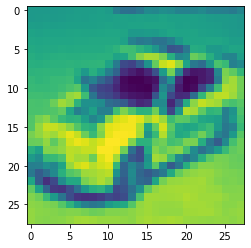

In [8]:
import matplotlib.pyplot as plt
plt.imshow(backdoor_dataset[2][0][0])

In [180]:
# for i,j in train_loader.dataset:
#     i[:,-5:,-5:,]=1
#     j=1
#     print(i)
#     break

all_data=[]
all_target=[]
for i,j in train_loader.dataset:
    if j == 5:
        j = torch.tensor(6)
    all_data.append(i)
    all_target.append(j)
    break

new_dataset_data = torch.stack(all_data)
new_dataset_target = torch.stack(all_target)

pixel_dataset = TensorDataset(new_dataset_data,new_dataset_target)



torch.Size([64, 1, 28, 28])


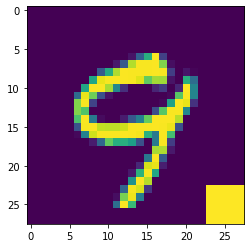

In [176]:
pixel_loader = DataLoader(pixel_dataset,batch_size=64,shuffle=True)

for i,j in pixel_loader:
    print(i.shape)
    plt.imshow(i[0][0])
    break

In [23]:
import numpy as np
labels = train_dataset.targets.numpy()
dict_users = {i: np.array([]) for i in range(20)}

idxs = np.arange(60000)
idxs_labels = np.vstack((idxs,labels))
idxs_labels = idxs_labels[:, idxs_labels[1, :].argsort()] #argsort排序返回索引
idxs = idxs_labels[0, :]

idx_shard = [i for i in range(200)]


In [19]:
kk = [1,2]
tt = [2,3]
kk+ tt

[1, 2, 2, 3]

In [72]:
from torch.utils.data import DataLoader,Dataset,TensorDataset
train_dataset.data = train_dataset.data[:12000]
train_loader = DataLoader(train_dataset)

In [74]:
for i in range(10):
    print(i)
    if i==5:
        break


0
1
2
3
4
5


In [223]:
kk = 100 * np.random.dirichlet(np.array(10 * [0.5]))
[int(round(i)) for i in kk]

[5, 4, 42, 0, 0, 12, 5, 14, 4, 14]

In [7]:
from collections import Counter
import torch
kk = torch.rand((3,5,5))
bb = kk.view(-1).numpy()
t = Counter(bb)
t

Counter({0.061324894: 1,
         0.48782027: 1,
         0.79120165: 1,
         0.060999215: 1,
         0.5734793: 1,
         0.95576334: 1,
         0.61075264: 1,
         0.09579706: 1,
         0.107647836: 1,
         0.55246866: 1,
         0.6836598: 1,
         0.49132258: 1,
         0.05168289: 1,
         0.28370887: 1,
         0.02612567: 1,
         0.72451794: 1,
         0.12967145: 1,
         0.6368691: 1,
         0.3262539: 1,
         0.7769999: 1,
         0.93121666: 1,
         0.43582493: 1,
         0.92212516: 1,
         0.15963662: 1,
         0.36683828: 1,
         0.48775637: 1,
         0.50189537: 1,
         0.77784854: 1,
         0.04653424: 1,
         0.141877: 1,
         0.34539384: 1,
         0.8359716: 1,
         0.68197596: 1,
         0.09807068: 1,
         0.6350919: 1,
         0.40250552: 1,
         0.06573522: 1,
         0.18535888: 1,
         0.5180687: 1,
         0.10308218: 1,
         0.3243158: 1,
         0.106012106: 1,

In [98]:
import numpy as np 
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import scipy.cluster.hierarchy as sch

k = [ list(np.random.randint(low=0,high=100,size=3)) for i in range(20)]

disMat = sch.distance.pdist(k,'euclidean') 
Z=sch.linkage(disMat,method='average') 
# P=sch.dendrogram(Z)
cluster= sch.fcluster(Z, t=2, criterion='maxclust') 
c1 = np.argwhere(cluster==1).reshape(-1)
c2 = np.argwhere(cluster==2).reshape(-1)

In [100]:
kk = torch.rand((1,5,4))
pp = torch.rand((4,5))
c = torch.cat([kk.view(-1),pp.view(-1)])

In [103]:
tt = [1,2]
type(tt) == list

True

In [107]:
x=np.array([[1,2],[3,4]]) 
np.repeat(x,2)

array([1, 1, 2, 2, 3, 3, 4, 4])

Z:
 [[ 2.          7.          0.          2.        ]
 [ 5.          6.          0.          2.        ]
 [ 1.          9.          1.          3.        ]
 [ 4.          8.          1.          3.        ]
 [ 0.         11.          1.66666667  4.        ]
 [ 3.         12.          3.25        5.        ]
 [10.         13.          7.26666667  8.        ]]
f:
 [2 1 2 2 2 1 1 2]


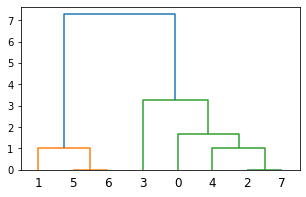

In [73]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, method='centroid')
f = fcluster(Z,t=5,criterion='distance')
fig = plt.figure(figsize=(5, 3))
dn = dendrogram(Z)
print('Z:\n', Z)
print('f:\n', f)
plt.show()
